In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.data_pipeline.DataLoader import DataLoader
from src.utility.sys_utils import get_spark

# import your model
from src.model.ALS_MF import ALS_MF

# import training pipeline
from src.data_pipeline.pipeline import cross_validation, test_evaluation

# import result checking tools
from src.utility.Summary import Summary

# Load whole data from the text file

In [4]:
spark = get_spark(cores=4) # change cores up to 6 if needed
data_loader = DataLoader(spark, "ml-1m-full")
data = data_loader.get_raw_data

Using split of range (0, 0.2), test set contains 144535 of 711400 records in total.


In [5]:
spark

In [14]:
train = data_loader.get_train_set()
test = data_loader.get_test_set()

In [15]:
full_df = train.union(test)

In [16]:
train.show(5)

+----+----+------+---------+
|user|item|rating|       ts|
+----+----+------+---------+
| 463|1020|   2.0|976228446|
| 463|3040|   3.0|976228332|
| 463|2683|   4.0|976228570|
| 463|1297|   3.0|976227754|
| 463|2797|   4.0|976227657|
+----+----+------+---------+
only showing top 5 rows



In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import *

In [18]:
pandas_df = train.select("*").toPandas()

In [19]:
pandas_df.head()
df = pandas_df

In [12]:
## popular movies
summary = pd.DataFrame(df.groupby(['item'])['rating'].mean())
summary['num_ratings'] = pd.DataFrame(df.groupby(['item'])['rating'].count())
summary.sort_values(['num_ratings'], ascending = False).head()

,rating,num_ratings
item,,
2858,4.306570,2466
1196,4.267968,2101
260,4.447444,2074
1210,4.021816,1971
2028,4.357530,1846


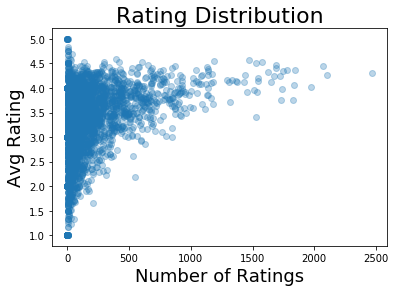

In [21]:
## ratings vs. num_ratings
plt.scatter(summary['num_ratings'], summary['rating'], alpha = 0.3)
plt.title("Rating Distribution", fontsize = 22)
plt.xlabel("Number of Ratings", fontsize = 18)
plt.ylabel("Avg Rating", fontsize = 18)

plt.savefig('rating_distribution_eda', format='jpg')